In [1]:
# Import Package

In [50]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import scipy.stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# 1. Make Sample Data 

In [73]:
# two subject(X0, X1), three student(y0, y1, y2)
# predict who student(y0, y1, y2) as two subject point

# student 0
X00 = scipy.stats.norm(80, 1).rvs(100)
X01 = scipy.stats.norm(70, 1).rvs(100)
X0 = np.vstack([X00, X01]).T

# student 1
X10 = scipy.stats.norm(70, 5).rvs(200)
X11 = scipy.stats.norm(90, 5).rvs(200)
X1 = np.vstack([X10, X11]).T

# student 2
X20 = scipy.stats.norm(70, 1).rvs(300)
X21 = scipy.stats.norm(80, 5).rvs(300)
X2 = np.vstack([X20, X21]).T

# merge student data as vertical
X = np.vstack([X0, X1, X2])

# category
y0 = np.zeros(100)
y1 = np.ones(200)
y2 = np.ones(300)*2
y = np.hstack([y0, y1, y2])[:, np.newaxis]

# merge for make pandas dataframe
m = np.hstack([X, y])

X.shape, y.shape, m.shape

((600, 2), (600, 1), (600, 3))

In [74]:
df = pd.DataFrame(m, columns=["subject_0","subject_1","student"])
df.tail()

,subject_0,subject_1,student
595,66.821704,75.952786,2.0
596,70.046716,77.303721,2.0
597,69.100753,84.241568,2.0
598,69.208940,79.732807,2.0
599,70.587497,76.716414,2.0


# 2. Draw Pairplot

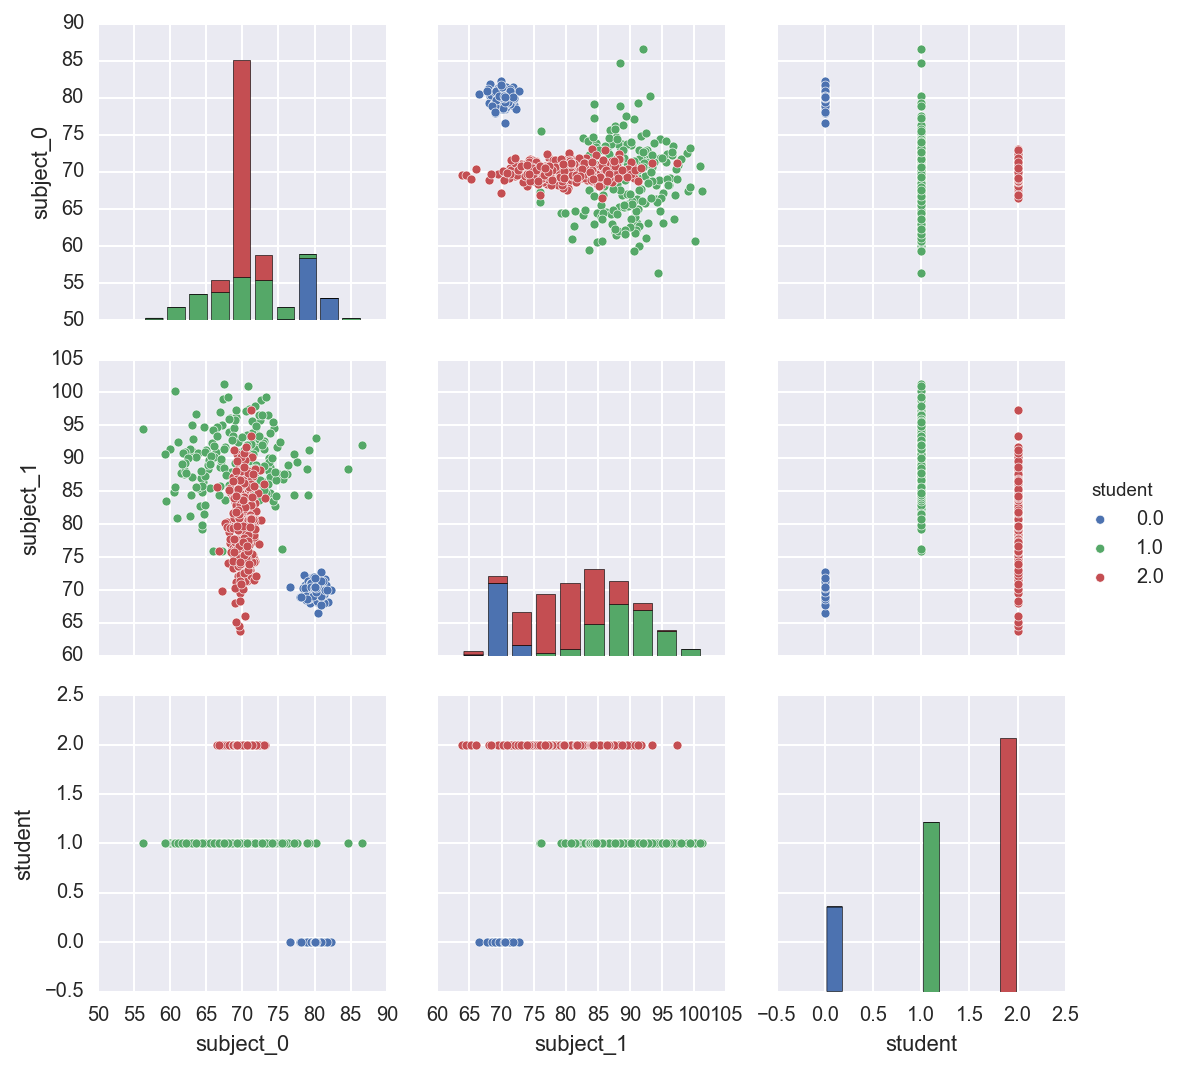

In [75]:
# draw pairplot on more 2 level 
sns.pairplot(df, hue="student")

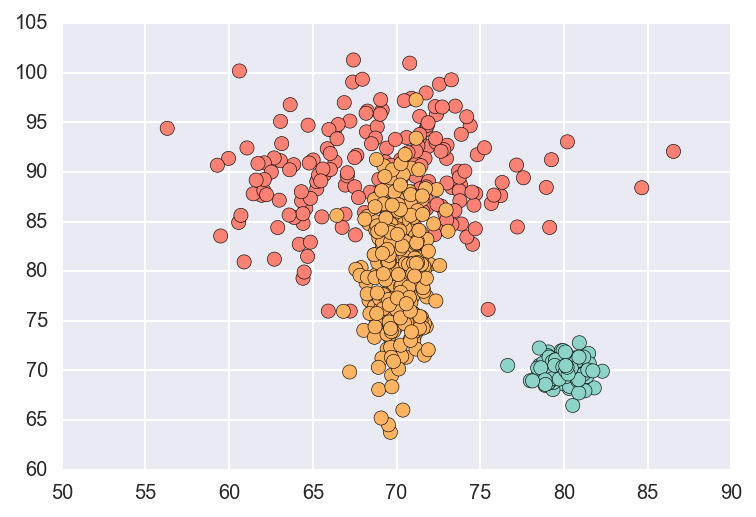

In [76]:
cmap = mpl.colors.ListedColormap(sns.color_palette("Set3"))
plt.scatter(df.subject_0, df.subject_1, c=y, s=50, cmap=cmap)

# 3. Make Gaussian Naive Bayes Model

In [77]:
y = np.hstack([y0, y1, y2]) # change y shape (600,1) -> (600,) because of DataConversionWarning
clf_norm = GaussianNB().fit(X, y)

In [78]:
clf_norm.classes_

array([ 0.,  1.,  2.])

In [79]:
 clf_norm.class_count_

array([ 100.,  200.,  300.])

In [80]:
clf_norm.class_prior_

array([ 0.16666667,  0.33333333,  0.5       ])

In [81]:
clf_norm.theta_

array([[ 79.91488301,  70.01215615],
       [ 69.24308549,  89.51594467],
       [ 70.07015894,  80.09972626]])

In [87]:
# sigma is square of sample data's distributhon
clf_norm.sigma_

array([[  0.91787546,   1.24542101],
       [ 22.84219207,  22.3139726 ],
       [  1.06906486,  28.26483329]])

# 4. Predict

In [88]:
y_pred = clf_norm.predict(X)

In [89]:
confusion_matrix(y, y_pred)

array([[100,   0,   0],
       [  0, 174,  26],
       [  0,  17, 283]])

In [90]:
print(classification_report(y, y_pred))

# this model performance is good!

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00       100
        1.0       0.91      0.87      0.89       200
        2.0       0.92      0.94      0.93       300

avg / total       0.93      0.93      0.93       600



(60, 110)

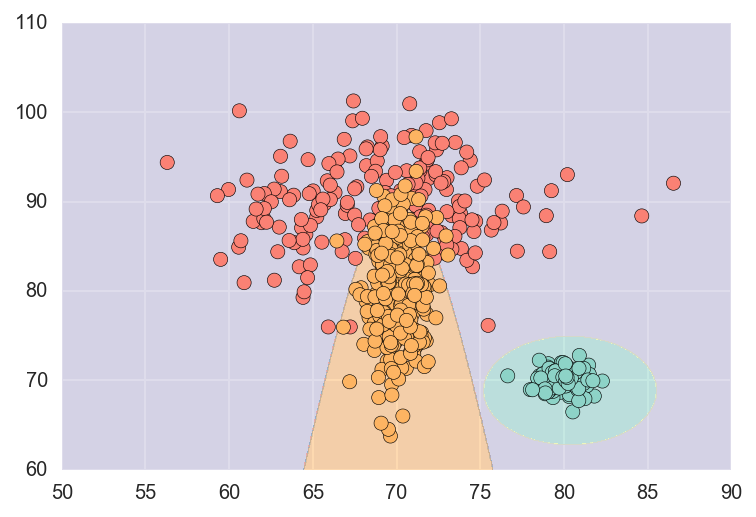

In [91]:
xmin, xmax = 50, 90
ymin, ymax = 60, 110
XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000), np.arange(ymin, ymax, (ymax-ymin)/1000))
ZZ = np.reshape(clf_norm.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette("Set3"))
plt.contourf(XX, YY, ZZ, cmap=cmap, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)